In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict
from scipy.stats.mstats import gmean

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display



%matplotlib inline



In [2]:
PSdf=pd.read_excel('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/Evaluations/MHW_PugetSoundMesoZoopBiomassDF.xlsx',engine='openpyxl')

In [3]:
PSdf

,Unnamed: 0,Key,Station,Site Name,Basin,Sub Basin,Lat,Lon,Sample Date,Sample Year,...,METACARCINUS MAGISTER,PINNIXA,PINNOTHERES,PUGETTIA,Year,YD,Amphipods,Euphausiids,Calanoids,Hydrozoans
0,0,010218ELIV1151,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2018-01-02,2018,...,0.485673,0.0,0.0,0.000000,2018,2,5.438239,0.134369,0.732556,0.412138
1,1,010818SKETV1058,SKETV,South Ketron/Solo Point,South Sound,South Sound,47.15243,-122.6586,2018-01-08,2018,...,0.438340,0.0,0.0,0.000000,2018,8,7.505748,0.000000,0.712084,0.037197
2,2,011119ELIV1052,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2019-01-11,2019,...,0.000000,0.0,0.0,0.000000,2019,11,4.452295,0.000000,0.905289,0.011121
3,3,011315CAMV1330,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,2015-01-13,2015,...,0.572797,0.0,0.0,0.000000,2015,13,6.376149,0.000000,6.978760,0.035561
4,4,011315MUKV1415,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,2015-01-13,2015,...,1.098103,0.0,0.0,0.000000,2015,13,15.713070,0.000000,4.084499,6.045911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,1154,121917LSNT01V1000,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2017-12-19,2017,...,0.000000,0.0,0.0,0.000000,2017,353,14.569518,0.011859,1.639055,0.053350
1155,1155,121917NSEX01V1224,NSEX01V,East Passage,Central Basin,S Central Basin,47.35862,-122.3871,2017-12-19,2017,...,0.000000,0.0,0.0,0.000000,2017,353,24.121695,0.000000,2.081817,0.015147
1156,1156,121918TDBV1327,TDBV,Thorndyke Bay,Hood Canal,N Hood Canal,47.78297,-122.7330,2018-12-19,2018,...,0.000000,0.0,0.0,0.000000,2018,353,8.147882,0.000000,0.904434,0.028217
1157,1157,122116LSNT01V1057,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2016-12-21,2016,...,0.000000,0.0,0.0,0.000000,2016,356,9.113340,0.000000,4.298667,0.143395


In [5]:
SoGdf=pd.read_excel('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/Evaluations/MHW_SoGMesoZoopBiomassDF.xlsx',engine='openpyxl')

In [6]:
SoGdf

,Unnamed: 0,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,...,Euphausiacea,Calanoida,Leptothecate,Year,Month,YD,Amphipods,Decapods,Euphausiids,Calanoids
0,0,HAK2016096000401,Northern Strait of Georgia,QU39,-125.099,50.031,10/24/2016,2016-10-24 17:19:00,Daylight,Bongo VNH,...,9.26809,12.17683,0.00000,2016,10,298,5.645282,0.000000,4.170640,5.479573
1,1,HAK2016096000501,Northern Strait of Georgia,QU39,-125.099,50.031,11/10/2016,2016-11-10 17:50:00,Daylight,Bongo VNH,...,5.06110,31.05908,0.35548,2016,11,315,1.788363,1.133748,2.277495,13.976586
2,2,HAK2016096000901,Northern Strait of Georgia,QU39,-125.099,50.031,12/5/2016,2016-12-05 21:29:00,Daylight,Bongo VNH,...,0.06198,8.40507,0.09764,2016,12,340,1.821973,0.518116,0.027891,3.782282
3,3,HAK2016096001001,Northern Strait of Georgia,QU39,-125.099,50.031,12/14/2016,2016-12-14 18:00:00,Daylight,Bongo VNH,...,0.65854,2.71573,0.04687,2016,12,349,0.930960,0.000000,0.296343,1.222079
4,4,HAK2017097000101,Northern Strait of Georgia,QU39,-125.099,50.031,1/5/2017,2017-01-05 19:30:00,Daylight,Bongo VNH,...,0.58255,4.91433,0.04690,2017,1,5,1.657881,0.046989,0.262147,2.211448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,2406,UVI2005000001401,Central Strait of Georgia,GEO1,-123.748,49.250,5/13/2005,2005-05-13 19:00:00,Daylight,SCOR VNH,...,3.43535,4.42425,7.66203,2005,5,133,0.657680,0.331713,1.545907,1.990913
2407,2407,UVI2005000001501,Central Strait of Georgia,GEO1,-123.748,49.250,5/13/2005,2005-05-13 19:15:00,Daylight,SCOR VNH,...,1.14309,5.46309,0.17165,2005,5,133,2.124648,0.350442,0.514390,2.458391
2408,2408,UVI2005000001601,Central Strait of Georgia,GEO1,-123.748,49.250,6/23/2005,2005-06-23 19:00:00,Daylight,SCOR VNH,...,0.77439,15.71802,0.55845,2005,6,174,0.949725,0.084438,0.348475,7.073109
2409,2409,UVI2005000001701,Central Strait of Georgia,GEO1,-123.748,49.250,6/23/2005,2005-06-23 19:15:00,Daylight,SCOR VNH,...,0.88086,7.04148,0.00994,2005,6,174,3.395475,0.185387,0.396387,3.168666


In [7]:
SoGdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date',
       'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Z_lower', 'Z_upper',
       'Bottom Depth(m)', 'Amphipoda', 'Decapoda', 'Euphausiacea', 'Calanoida',
       'Leptothecate', 'Year', 'Month', 'YD', 'Amphipods', 'Decapods',
       'Euphausiids', 'Calanoids'],
      dtype='object')

In [8]:
SoGdf.rename(columns={'Leptothecate':'Hydrozoans'},inplace=True)

In [9]:
SoGdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date',
       'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Z_lower', 'Z_upper',
       'Bottom Depth(m)', 'Amphipoda', 'Decapoda', 'Euphausiacea', 'Calanoida',
       'Hydrozoans', 'Year', 'Month', 'YD', 'Amphipods', 'Decapods',
       'Euphausiids', 'Calanoids'],
      dtype='object')

In [10]:
SoGdf.drop(labels=['Station','Twilight', 'Net_Type', 'Mesh_Size(um)','Bottom Depth(m)', 'Amphipoda', 'Euphausiacea', 'Calanoida',
       'Decapoda',  'Year', 'Month', ],axis=1,inplace=True) #removed 'YD' from drop list

In [11]:
SoGdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Z_lower', 'Z_upper', 'Hydrozoans', 'YD', 'Amphipods', 'Decapods',
       'Euphausiids', 'Calanoids'],
      dtype='object')

In [12]:
#rename columns


In [13]:
PSdf.keys()

Index(['Unnamed: 0', 'Key', 'Station', 'Site Name', 'Basin', 'Sub Basin',
       'Lat', 'Lon', 'Sample Date', 'Sample Year', 'Sample Month',
       'Sample Time', 'Mesh Size', 'Diameter (cm)', 'Z', 'Z_lower', 'Z_upper',
       'dtUTC', 'CALANUS MARSHALLAE', 'CALANUS PACIFICUS', 'EUCALANUS',
       'EUCALANUS BUNGII', 'METRIDIA PACIFICA', 'NEOCALANUS PLUMCHRUS',
       'CYPHOCARIS CHALLENGERI', 'CALLIOPIUS PACIFICUS', 'GAMMARIDEA',
       'THEMISTO PACIFICA', 'EUPHAUSIA PACIFICA', 'THYSANOESSA RASCHII',
       'CHAETOGNATHA', 'CLYTIA GREGARIA', 'AEQUOREA VICTORIA',
       'AGLANTHA DIGITALE', 'BARNACLES', 'FABIA SUBQUADRATA',
       'CANCER PRODUCTUS', 'CANCRIDAE', 'Cancridae Lg', 'Cancridae Sm',
       'GLEBOCARCINUS OREGONENSIS', 'LOPHOPANOPEUS BELLUS',
       'METACARCINUS GRACILIS', 'METACARCINUS MAGISTER', 'PINNIXA',
       'PINNOTHERES', 'PUGETTIA', 'Year', 'YD', 'Amphipods', 'Euphausiids',
       'Calanoids', 'Hydrozoans'],
      dtype='object')

In [14]:
#rename columns
#

In [15]:
PSdf.drop(labels=['Site Name','Station','Sub Basin', 'Sample Year', 'Sample Month',
       'Sample Time','Mesh Size', 'Diameter (cm)','Z',
        'CALANUS MARSHALLAE', 'CALANUS PACIFICUS', 'EUCALANUS',
       'EUCALANUS BUNGII', 'METRIDIA PACIFICA', 'NEOCALANUS PLUMCHRUS',
       'CYPHOCARIS CHALLENGERI', 'CALLIOPIUS PACIFICUS', 'GAMMARIDEA',
       'THEMISTO PACIFICA', 'EUPHAUSIA PACIFICA', 'THYSANOESSA RASCHII',
       'CHAETOGNATHA', 'CLYTIA GREGARIA', 'AEQUOREA VICTORIA',
       'AGLANTHA DIGITALE', 'BARNACLES', 'FABIA SUBQUADRATA',
       'CANCER PRODUCTUS', 'CANCRIDAE', 'Cancridae Lg', 'Cancridae Sm',
       'GLEBOCARCINUS OREGONENSIS', 'LOPHOPANOPEUS BELLUS',
       'METACARCINUS GRACILIS', 'METACARCINUS MAGISTER', 'PINNIXA',
       'PINNOTHERES', 'PUGETTIA', 'Year', ],axis=1,inplace=True) #removed 'YD' from drop list

In [16]:
PSdf.keys()

Index(['Unnamed: 0', 'Key', 'Basin', 'Lat', 'Lon', 'Sample Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'YD', 'Amphipods', 'Euphausiids', 'Calanoids',
       'Hydrozoans'],
      dtype='object')

In [17]:
PSdf.rename(columns={'Basin':'region_name','Sample Date':'Date'},inplace=True)

In [18]:
SoGdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Z_lower', 'Z_upper', 'Hydrozoans', 'YD', 'Amphipods', 'Decapods',
       'Euphausiids', 'Calanoids'],
      dtype='object')

In [20]:
SoGdf.drop(labels=['Decapods' ],axis=1,inplace=True)

In [21]:
PSdf.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lat', 'Lon', 'Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'YD', 'Amphipods', 'Euphausiids', 'Calanoids',
       'Hydrozoans'],
      dtype='object')

In [22]:
SalishSeadf=pd.concat([PSdf, SoGdf], ignore_index=True)

In [23]:
SalishSeadf

,Unnamed: 0,Key,region_name,Lat,Lon,Date,Z_lower,Z_upper,dtUTC,YD,Amphipods,Euphausiids,Calanoids,Hydrozoans
0,0,010218ELIV1151,Bellingham Bay,48.63795,-122.5694,2018-01-02 00:00:00,110.0,0,2018-01-02 19:51:00,2,5.438239,0.134369,0.732556,0.412138
1,1,010818SKETV1058,South Sound,47.15243,-122.6586,2018-01-08 00:00:00,122.0,0,2018-01-08 18:58:00,8,7.505748,0.000000,0.712084,0.037197
2,2,011119ELIV1052,Bellingham Bay,48.63795,-122.5694,2019-01-11 00:00:00,114.0,0,2019-01-11 18:52:00,11,4.452295,0.000000,0.905289,0.011121
3,3,011315CAMV1330,Whidbey Basin,48.05901,-122.3873,2015-01-13 00:00:00,170.0,0,2015-01-13 21:30:00,13,6.376149,0.000000,6.978760,0.035561
4,4,011315MUKV1415,Whidbey Basin,47.97166,-122.3222,2015-01-13 00:00:00,190.0,0,2015-01-13 22:15:00,13,15.713070,0.000000,4.084499,6.045911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,2406,UVI2005000001401,Central Strait of Georgia,49.25000,-123.7480,5/13/2005,100.0,0,2005-05-13 19:00:00,133,0.657680,1.545907,1.990913,7.662030
3566,2407,UVI2005000001501,Central Strait of Georgia,49.25000,-123.7480,5/13/2005,390.0,0,2005-05-13 19:15:00,133,2.124648,0.514390,2.458391,0.171650
3567,2408,UVI2005000001601,Central Strait of Georgia,49.25000,-123.7480,6/23/2005,100.0,0,2005-06-23 19:00:00,174,0.949725,0.348475,7.073109,0.558450
3568,2409,UVI2005000001701,Central Strait of Georgia,49.25000,-123.7480,6/23/2005,390.0,0,2005-06-23 19:15:00,174,3.395475,0.396387,3.168666,0.009940


In [24]:
#create new columns
SalishSeadf['Month']=[ii.month for ii in SalishSeadf['dtUTC']]
SalishSeadf['Year']=[ii.year for ii in SalishSeadf['dtUTC']]

In [24]:
#SalishSeadf.to_excel("SalishSeaBiomassDF.xlsx")

In [25]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [26]:
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

In [27]:
#look at data for MHW years 2014-2017

View2013=SalishSeadf.loc[SalishSeadf.Year==2013]
View2014=SalishSeadf.loc[SalishSeadf.Year==2014]
View2015=SalishSeadf.loc[SalishSeadf.Year==2015]
View2016=SalishSeadf.loc[SalishSeadf.Year==2016]
View2017=SalishSeadf.loc[SalishSeadf.Year==2017]
ViewMHW=SalishSeadf.loc[(SalishSeadf.Year==2014)|(SalishSeadf.Year==2015)|(SalishSeadf.Year==2016)]


In [28]:
ViewMHW.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lat', 'Lon', 'Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'YD', 'Amphipods', 'Euphausiids', 'Calanoids',
       'Hydrozoans', 'Month', 'Year'],
      dtype='object')

In [32]:
ViewMHW['region_name'].unique()

array(['Whidbey Basin', 'Central Basin', 'Admiralty Inlet', 'Hood Canal',
       'South Sound', 'Bellingham Bay', 'San Juan',
       'Northern Strait of Georgia', 'Central Strait of Georgia',
       'Gulf Islands', 'Tidal Mixed', 'Juan de Fuca',
       'Southern Strait of Georgia', 'Baynes Sound',
       'Nearshore North West', 'San Juan Islands', 'Nearshore-North East'],
      dtype=object)

In [33]:
#look at data for a specific region
ViewMainSoG=SalishSeadf.loc[(SalishSeadf.region_name=='Central Strait of Georgia')|(SalishSeadf.region_name=='Northern Strait of Georgia')|\
                     (SalishSeadf.region_name=='Southern Strait of Georgia')]

ViewMixed=SalishSeadf.loc[SalishSeadf.region_name=='Tidal Mixed']

ViewJdF=SalishSeadf.loc[SalishSeadf.region_name=='Juan de Fuca']
ViewPS=SalishSeadf.loc[SalishSeadf.region_name=='Central Basin']

In [34]:
ViewJdF.keys()

Index(['Unnamed: 0', 'Key', 'region_name', 'Lat', 'Lon', 'Date', 'Z_lower',
       'Z_upper', 'dtUTC', 'YD', 'Amphipods', 'Euphausiids', 'Calanoids',
       'Hydrozoans', 'Month', 'Year'],
      dtype='object')

## Calculate Climatology for each subregion

In [35]:
annualmean_MainSoG=ViewMainSoG.groupby(['Year']).mean()
annualmean_Mixed=ViewMixed.groupby(['Year']).mean()
annualmean_JdF=ViewJdF.groupby(['Year']).mean()
annualmean_PS=ViewPS.groupby(['Year']).mean()

In [36]:
clim_MainSoG=annualmean_MainSoG.mean()
clim_Mixed=annualmean_Mixed.mean()
clim_JdF=annualmean_JdF.mean()
clim_PS=annualmean_PS.mean()

In [38]:
mhw_MainSoG=ViewMHW.loc[(ViewMHW.region_name=='Central Strait of Georgia')|(ViewMHW.region_name=='Northern Strait of Georgia')|\
                     (ViewMHW.region_name=='Southern Strait of Georgia')]
                    

mhw_Mixed=ViewMHW.loc[(ViewMHW.region_name=='Tidal Mixed')]

mhw_JdF=ViewMHW.loc[(ViewMHW.region_name=='Juan de Fuca')]

mhw_PS=ViewMHW.loc[(ViewMHW.region_name=='Central Basin')]
                    


In [39]:
mhwmean_MainSoG=mhw_MainSoG.groupby(['Year']).mean()
mhwmean_Mixed=mhw_Mixed.groupby(['Year']).mean()
mhwmean_JdF=mhw_JdF.groupby(['Year']).mean()
mhwmean_PS=mhw_PS.groupby(['Year']).mean()

In [40]:
mhwmean_MainSoG=mhwmean_MainSoG.mean()
mhwmean_Mixed=mhwmean_Mixed.mean()
mhwmean_JdF=mhwmean_JdF.mean()
mhwmean_PS=mhwmean_PS.mean()

In [42]:
mhwmean_PS

Unnamed: 0     616.342674
Lat             47.546501
Lon           -122.416030
Z_lower        189.861607
Z_upper          0.000000
YD             192.689938
Amphipods       22.280679
Euphausiids      0.154788
Calanoids       10.458942
Hydrozoans       2.979059
Month            6.927615
dtype: float64

In [94]:
clim_PS['Amphipods']

22.425171572373102

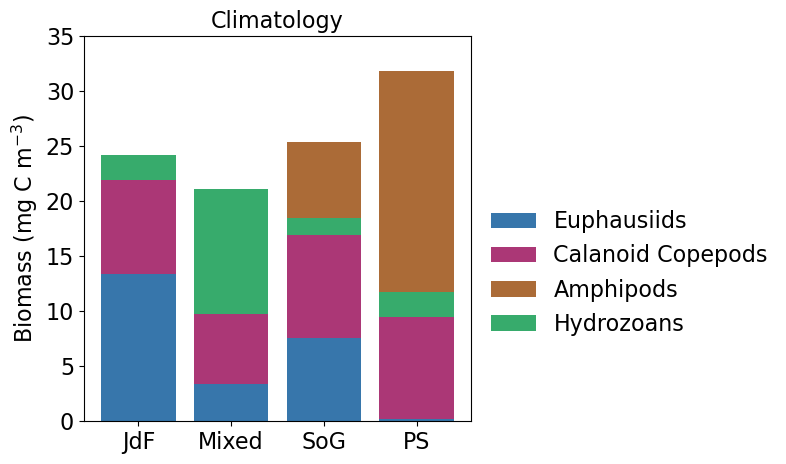

In [93]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}


x = ['JdF', 'Mixed', 'SoG','PS']
y1 = [clim_JdF['Euphausiids'],clim_Mixed['Euphausiids'],clim_MainSoG['Euphausiids'],clim_PS['Euphausiids']]
y2 = [clim_JdF['Calanoids'],clim_Mixed['Calanoids'],clim_MainSoG['Calanoids'],clim_PS['Calanoids']]
y3 = [clim_JdF['Amphipods'],clim_Mixed['Amphipods'],clim_MainSoG['Amphipods'],clim_PS['Amphipods']]
y4 = [clim_JdF['Hydrozoans'],clim_Mixed['Hydrozoans'],clim_MainSoG['Hydrozoans'],clim_PS['Hydrozoans']]

y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)
 
# plot bars in stack manner
plt.bar(x, y1, color='#3776ab',label='Euphausiids')
plt.bar(x, y2, bottom=y1,color='#ab3776',label='Calanoid Copepods')
plt.bar(x, y3, bottom=np.add(y1,y2),color='#ab6b37',label='Amphipods')
plt.bar(x, y4, bottom=np.add(y1,y2,y3), color='#37ab6c',label='Hydrozoans')

plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(0,35)
ax.set_ylabel('Biomass (mg C m$^{-3}$)')
ax.set_title('Climatology')
plt.show()

No handles with labels found to put in legend.
/tmp/ipykernel_3276318/28650661.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x,fontsize=12,rotation=40)


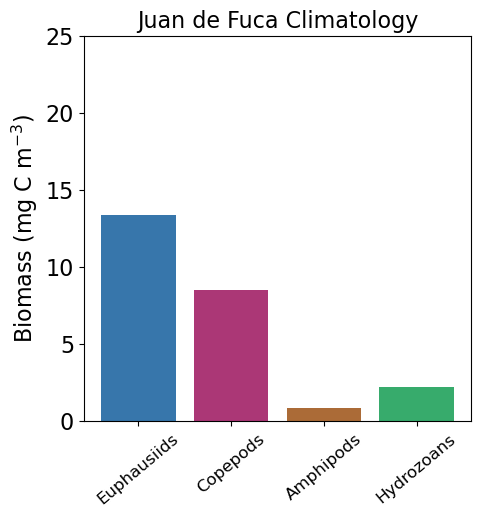

In [114]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}


x = ['Euphausiids', 'Copepods','Amphipods','Hydrozoans']
y =[clim_JdF['Euphausiids'],clim_JdF['Calanoids'],clim_JdF['Amphipods'],clim_JdF['Hydrozoans']]

colors=['#3776ab','#ab3776','#ab6b37','#37ab6c']
#y1 = [,clim_Mixed['Euphausiids'],clim_MainSoG['Euphausiids'],clim_PS['Euphausiids']]
#y2 = [,clim_Mixed['Calanoids'],clim_MainSoG['Calanoids'],clim_PS['Calanoids']]
#y3 = [,clim_Mixed['Amphipods'],clim_MainSoG['Amphipods'],clim_PS['Amphipods']]
#y4 = [,clim_Mixed['Hydrozoans'],clim_MainSoG['Hydrozoans'],clim_PS['Hydrozoans']]

#y1=np.array(y1)
#y2=np.array(y2)
#y3=np.array(y3)
#y4=np.array(y4)
 
# plot bars in stack manner
plt.bar(x,y,color=colors,label='')
#plt.bar(x, y2, bottom=y1,color=,label='Calanoid Copepods')
#plt.bar(x, y3, bottom=np.add(y1,y2),color=,label='Amphipods')
#plt.bar(x, y4, bottom=np.add(y1,y2,y3), color=,label='Hydrozoans')

plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(0,25)
ax.set_xticklabels(labels=x,fontsize=12,rotation=40)
ax.set_ylabel('Biomass (mg C m$^{-3}$)')
ax.set_title('Juan de Fuca Climatology')
plt.show()

No handles with labels found to put in legend.
/tmp/ipykernel_3276318/931360420.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x,fontsize=12,rotation=40)


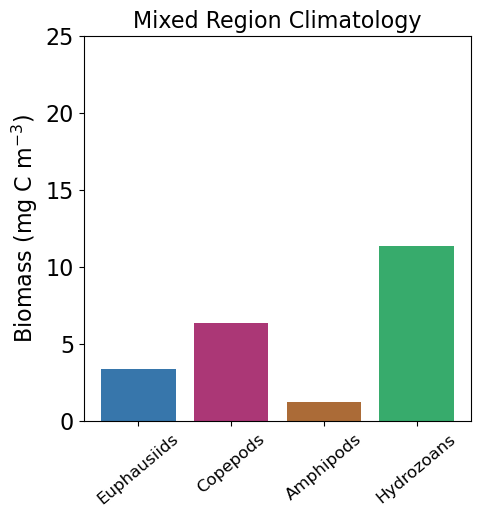

In [113]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}


x = ['Euphausiids', 'Copepods','Amphipods','Hydrozoans']
y =[clim_Mixed['Euphausiids'],clim_Mixed['Calanoids'],clim_Mixed['Amphipods'],clim_Mixed['Hydrozoans']]

colors=['#3776ab','#ab3776','#ab6b37','#37ab6c']
#y1 = [,clim_Mixed['Euphausiids'],clim_MainSoG['Euphausiids'],clim_PS['Euphausiids']]
#y2 = [,clim_Mixed['Calanoids'],clim_MainSoG['Calanoids'],clim_PS['Calanoids']]
#y3 = [,clim_Mixed['Amphipods'],clim_MainSoG['Amphipods'],clim_PS['Amphipods']]
#y4 = [,clim_Mixed['Hydrozoans'],clim_MainSoG['Hydrozoans'],clim_PS['Hydrozoans']]

#y1=np.array(y1)
#y2=np.array(y2)
#y3=np.array(y3)
#y4=np.array(y4)
 
# plot bars in stack manner
plt.bar(x,y,color=colors,label='')
#plt.bar(x, y2, bottom=y1,color=,label='Calanoid Copepods')
#plt.bar(x, y3, bottom=np.add(y1,y2),color=,label='Amphipods')
#plt.bar(x, y4, bottom=np.add(y1,y2,y3), color=,label='Hydrozoans')

plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(0,25)
ax.set_xticklabels(labels=x,fontsize=12,rotation=40)
ax.set_ylabel('Biomass (mg C m$^{-3}$)')
ax.set_title('Mixed Region Climatology')
plt.show()

No handles with labels found to put in legend.
/tmp/ipykernel_3276318/1111920695.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x,fontsize=12,rotation=40)


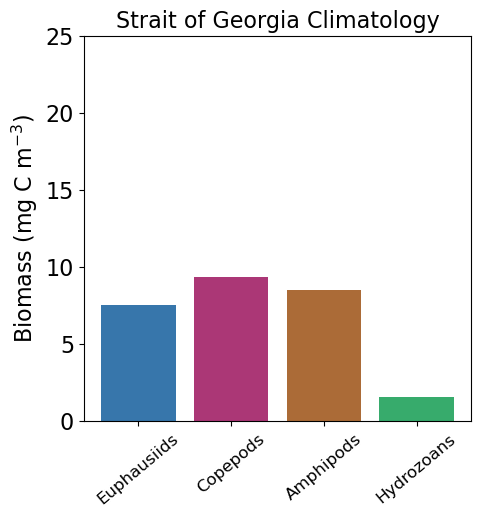

In [115]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}


x = ['Euphausiids', 'Copepods','Amphipods','Hydrozoans']
y =[clim_MainSoG['Euphausiids'],clim_MainSoG['Calanoids'],clim_MainSoG['Amphipods'],clim_MainSoG['Hydrozoans']]

colors=['#3776ab','#ab3776','#ab6b37','#37ab6c']
#y1 = [,clim_Mixed['Euphausiids'],clim_MainSoG['Euphausiids'],clim_PS['Euphausiids']]
#y2 = [,clim_Mixed['Calanoids'],clim_MainSoG['Calanoids'],clim_PS['Calanoids']]
#y3 = [,clim_Mixed['Amphipods'],clim_MainSoG['Amphipods'],clim_PS['Amphipods']]
#y4 = [,clim_Mixed['Hydrozoans'],clim_MainSoG['Hydrozoans'],clim_PS['Hydrozoans']]

#y1=np.array(y1)
#y2=np.array(y2)
#y3=np.array(y3)
#y4=np.array(y4)
 
# plot bars in stack manner
plt.bar(x,y,color=colors,label='')
#plt.bar(x, y2, bottom=y1,color=,label='Calanoid Copepods')
#plt.bar(x, y3, bottom=np.add(y1,y2),color=,label='Amphipods')
#plt.bar(x, y4, bottom=np.add(y1,y2,y3), color=,label='Hydrozoans')

plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(0,25)
ax.set_xticklabels(labels=x,fontsize=12,rotation=40)
ax.set_ylabel('Biomass (mg C m$^{-3}$)')
ax.set_title('Strait of Georgia Climatology')
plt.show()

No handles with labels found to put in legend.
/tmp/ipykernel_3276318/2749304820.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x,fontsize=12,rotation=40)


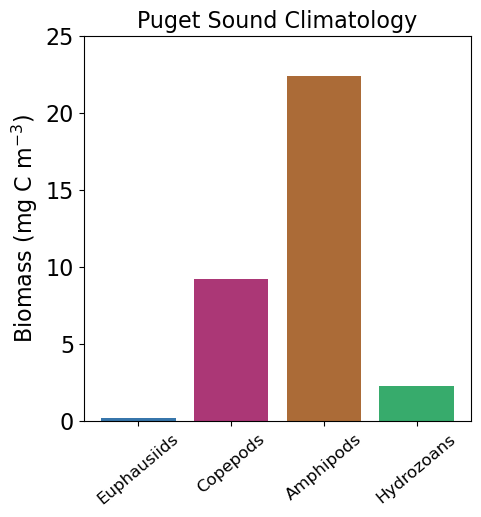

In [112]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}


x = ['Euphausiids', 'Copepods','Amphipods','Hydrozoans']
y =[clim_PS['Euphausiids'],clim_PS['Calanoids'],clim_PS['Amphipods'],clim_PS['Hydrozoans']]

colors=['#3776ab','#ab3776','#ab6b37','#37ab6c']
#y1 = [,clim_Mixed['Euphausiids'],clim_MainSoG['Euphausiids'],clim_PS['Euphausiids']]
#y2 = [,clim_Mixed['Calanoids'],clim_MainSoG['Calanoids'],clim_PS['Calanoids']]
#y3 = [,clim_Mixed['Amphipods'],clim_MainSoG['Amphipods'],clim_PS['Amphipods']]
#y4 = [,clim_Mixed['Hydrozoans'],clim_MainSoG['Hydrozoans'],clim_PS['Hydrozoans']]

#y1=np.array(y1)
#y2=np.array(y2)
#y3=np.array(y3)
#y4=np.array(y4)
 
# plot bars in stack manner
plt.bar(x,y,color=colors,label='')
#plt.bar(x, y2, bottom=y1,color=,label='Calanoid Copepods')
#plt.bar(x, y3, bottom=np.add(y1,y2),color=,label='Amphipods')
#plt.bar(x, y4, bottom=np.add(y1,y2,y3), color=,label='Hydrozoans')

plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(0,25)
ax.set_xticklabels(labels=x,fontsize=12,rotation=40)
ax.set_ylabel('Biomass (mg C m$^{-3}$)')
ax.set_title('Puget Sound Climatology')
plt.show()

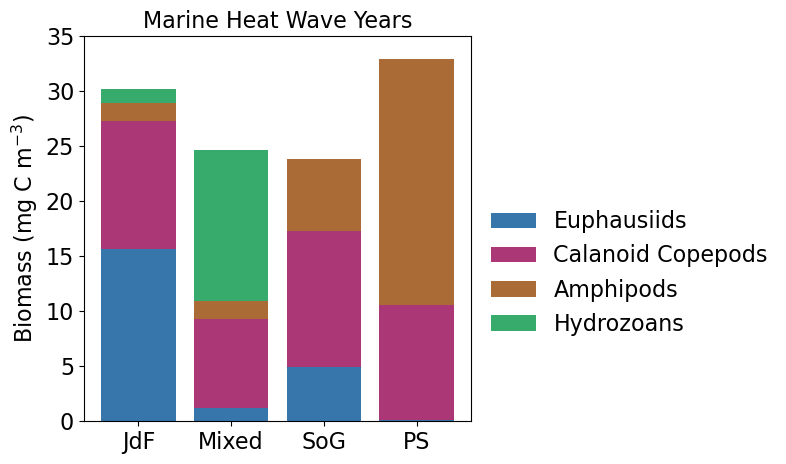

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}


x = ['JdF', 'Mixed', 'SoG','PS']
y1 = [mhwmean_JdF['Euphausiids'],mhwmean_Mixed['Euphausiids'],mhwmean_MainSoG['Euphausiids'],mhwmean_PS['Euphausiids']]
y2 = [mhwmean_JdF['Calanoids'],mhwmean_Mixed['Calanoids'],mhwmean_MainSoG['Calanoids'],mhwmean_PS['Calanoids']]
y3 = [mhwmean_JdF['Amphipods'],mhwmean_Mixed['Amphipods'],mhwmean_MainSoG['Amphipods'],mhwmean_PS['Amphipods']]
y4 = [mhwmean_JdF['Hydrozoans'],mhwmean_Mixed['Hydrozoans'],mhwmean_MainSoG['Hydrozoans'],mhwmean_PS['Hydrozoans']]
 
y1=np.array(y1)
y2=np.array(y2)
y3=np.array(y3)
y4=np.array(y4)
    
# plot bars in stack manner
plt.bar(x, y1, color='#3776ab',label='Euphausiids')
plt.bar(x, y2, bottom=y1, color='#ab3776',label='Calanoid Copepods',zorder=1)
plt.bar(x, y3, bottom=np.add(y1,y2), color='#ab6b37',label='Amphipods',zorder=4)
plt.bar(x, y4, bottom=np.add(y1,y2,y3), color='#37ab6c',label='Hydrozoans',zorder=2)
plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(0,35)
ax.set_ylabel('Biomass (mg C m$^{-3}$)')
ax.set_title('Marine Heat Wave Years')
plt.show()

In [49]:
mhwmean_PS['Euphausiids']-clim_PS['Euphausiids']

-0.038759876944367555

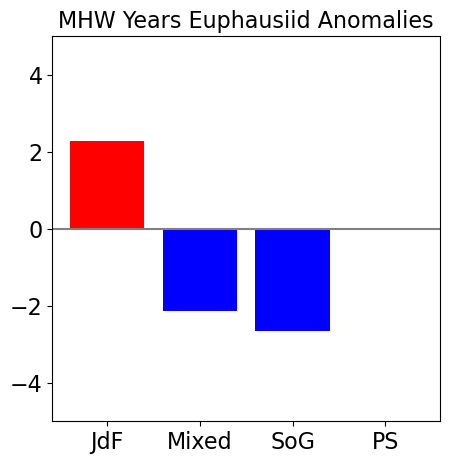

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}

x1='JdF'
x2='Mixed'
x3='SoG'
x4='PS'
y1=mhwmean_JdF['Euphausiids']-clim_JdF['Euphausiids']
y2=mhwmean_Mixed['Euphausiids']-clim_Mixed['Euphausiids']
y3=mhwmean_MainSoG['Euphausiids']-clim_MainSoG['Euphausiids']
y4=mhwmean_PS['Euphausiids']-clim_PS['Euphausiids']

#x = ['JdF', 'Mixed', 'SoG']
#y1 = [mhwmean_JdF['Euphausiids']-clim_JdF['Euphausiids'],mhwmean_Mixed['Euphausiids'],mhwmean_MainSoG['Euphausiids']]
#y2 = [mhwmean_JdF['Calanoids']-clim_JdF['Calanoids'],mhwmean_Mixed['Calanoids'],mhwmean_MainSoG['Calanoids']]
#y3 = [mhwmean_JdF['Amphipods']-clim_JdF['Amphipods'],mhwmean_Mixed['Amphipods'],mhwmean_MainSoG['Amphipods']]
#y4 = [mhwmean_JdF['Leptothecate']-clim_JdF['Leptothecate'],mhwmean_Mixed['Leptothecate'],mhwmean_MainSoG['Leptothecate']]
 
ax.bar(x1,y1,color='r',label='Euphausiids')
ax.bar(x2,y2,color='b')
ax.bar(x3,y3,color='b')
ax.bar(x4,y4,color='b')
#plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(-5,5)
ax.axhline(y=0,color='grey')
ax.set_title('MHW Years Euphausiid Anomalies')
plt.show()

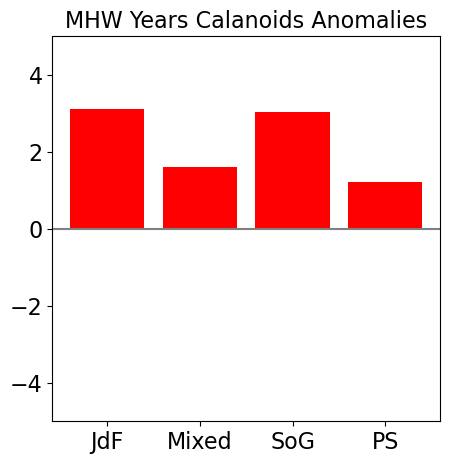

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}

x1='JdF'
x2='Mixed'
x3='SoG'
x4='PS'
y1=mhwmean_JdF['Calanoids']-clim_JdF['Calanoids']
y2=mhwmean_Mixed['Calanoids']-clim_Mixed['Calanoids']
y3=mhwmean_MainSoG['Calanoids']-clim_MainSoG['Calanoids']
y4=mhwmean_PS['Calanoids']-clim_PS['Calanoids']
#x = ['JdF', 'Mixed', 'SoG']
#y1 = [mhwmean_JdF['Euphausiids']-clim_JdF['Euphausiids'],mhwmean_Mixed['Euphausiids'],mhwmean_MainSoG['Euphausiids']]
#y2 = [mhwmean_JdF['Calanoids']-clim_JdF['Calanoids'],mhwmean_Mixed['Calanoids'],mhwmean_MainSoG['Calanoids']]
#y3 = [mhwmean_JdF['Amphipods']-clim_JdF['Amphipods'],mhwmean_Mixed['Amphipods'],mhwmean_MainSoG['Amphipods']]
#y4 = [mhwmean_JdF['Leptothecate']-clim_JdF['Leptothecate'],mhwmean_Mixed['Leptothecate'],mhwmean_MainSoG['Leptothecate']]
 
ax.bar(x1,y1,color='r',label='Calanoids')
ax.bar(x2,y2,color='r')
ax.bar(x3,y3,color='r')
ax.bar(x4,y4,color='r')
#plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(-5,5)
ax.axhline(y=0,color='grey')
ax.set_title('MHW Years Calanoids Anomalies')
plt.show()

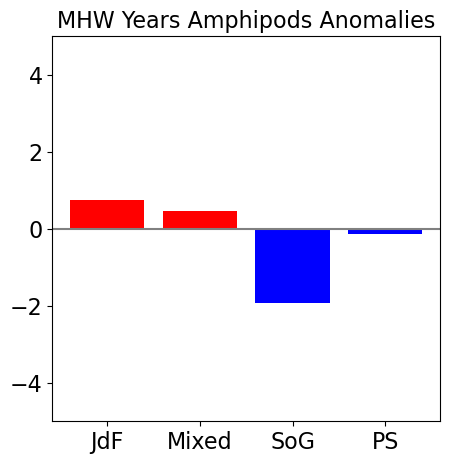

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}

x1='JdF'
x2='Mixed'
x3='SoG'
x4='PS'
y1=mhwmean_JdF['Amphipods']-clim_JdF['Amphipods']
y2=mhwmean_Mixed['Amphipods']-clim_Mixed['Amphipods']
y3=mhwmean_MainSoG['Amphipods']-clim_MainSoG['Amphipods']
y4=mhwmean_PS['Amphipods']-clim_PS['Amphipods']
#x = ['JdF', 'Mixed', 'SoG']
#y1 = [mhwmean_JdF['Euphausiids']-clim_JdF['Euphausiids'],mhwmean_Mixed['Euphausiids'],mhwmean_MainSoG['Euphausiids']]
#y2 = [mhwmean_JdF['Calanoids']-clim_JdF['Calanoids'],mhwmean_Mixed['Calanoids'],mhwmean_MainSoG['Calanoids']]
#y3 = [mhwmean_JdF['Amphipods']-clim_JdF['Amphipods'],mhwmean_Mixed['Amphipods'],mhwmean_MainSoG['Amphipods']]
#y4 = [mhwmean_JdF['Leptothecate']-clim_JdF['Leptothecate'],mhwmean_Mixed['Leptothecate'],mhwmean_MainSoG['Leptothecate']]
 
ax.bar(x1,y1,color='r',label='Amphipods')
ax.bar(x2,y2,color='r')
ax.bar(x3,y3,color='b')
ax.bar(x4,y4,color='b')
#plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(-5,5)
ax.axhline(y=0,color='grey')
ax.set_title('MHW Years Amphipods Anomalies')
plt.show()

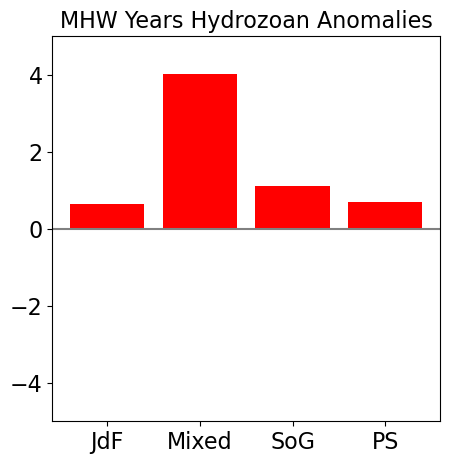

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}

x1='JdF'
x2='Mixed'
x3='SoG'
x4='PS'
y1=mhwmean_JdF['Hydrozoans']-clim_JdF['Hydrozoans']
y2=mhwmean_Mixed['Hydrozoans']-clim_Mixed['Hydrozoans']
y3=mhwmean_MainSoG['Hydrozoans']-clim_MainSoG['Hydrozoans']
y4=mhwmean_PS['Hydrozoans']-clim_PS['Hydrozoans']
#x = ['JdF', 'Mixed', 'SoG']
#y1 = [mhwmean_JdF['Euphausiids']-clim_JdF['Euphausiids'],mhwmean_Mixed['Euphausiids'],mhwmean_MainSoG['Euphausiids']]
#y2 = [mhwmean_JdF['Calanoids']-clim_JdF['Calanoids'],mhwmean_Mixed['Calanoids'],mhwmean_MainSoG['Calanoids']]
#y3 = [mhwmean_JdF['Amphipods']-clim_JdF['Amphipods'],mhwmean_Mixed['Amphipods'],mhwmean_MainSoG['Amphipods']]
#y4 = [mhwmean_JdF['Leptothecate']-clim_JdF['Leptothecate'],mhwmean_Mixed['Leptothecate'],mhwmean_MainSoG['Leptothecate']]
 
ax.bar(x1,y1,color='r',label='Hydrozoan')
ax.bar(x2,y2,color='r')
ax.bar(x3,y3,color='r')
ax.bar(x4,y4,color='r')
#plt.legend(frameon=False,bbox_to_anchor=[1,.6,0,0])
ax.set_ylim(-5,5)
ax.axhline(y=0,color='grey')
ax.set_title('MHW Years Hydrozoan Anomalies')
plt.show()